In [3]:
import yfinance as yf
stock=input("Enter the stock name: ")
st_data=yf.Ticker(stock)
st_data=st_data.history(period="max")

Enter the stock name: TSLA


In [4]:
st_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-26 00:00:00-04:00,263.250000,268.040009,261.750000,264.350006,95856200,0.0,0.0
2023-07-27 00:00:00-04:00,268.309998,269.130005,255.300003,255.710007,103697300,0.0,0.0
2023-07-28 00:00:00-04:00,259.859985,267.250000,258.230011,266.440002,111149300,0.0,0.0


<AxesSubplot:xlabel='Date'>

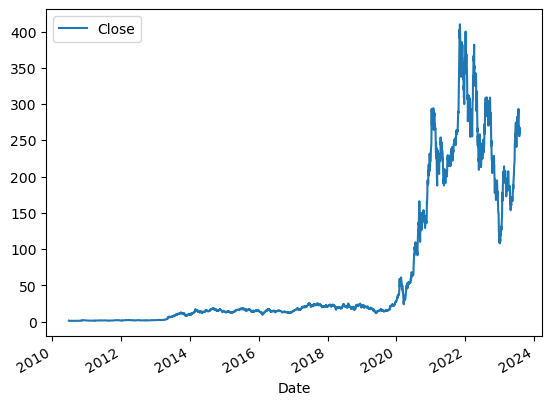

In [11]:
st_data.plot.line(y="Close", use_index=True)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [13]:
st_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [15]:
stockinfo=st_data["Close"]
training_set=pd.DataFrame(stockinfo)

In [16]:
training_set.head()

,Close
Date,
2010-06-29 00:00:00-04:00,1.592667
2010-06-30 00:00:00-04:00,1.588667
2010-07-01 00:00:00-04:00,1.464000
2010-07-02 00:00:00-04:00,1.280000
2010-07-06 00:00:00-04:00,1.074000


In [17]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [18]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [20]:
!pip install tensorflow

In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [22]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 13s 78ms/step - loss: 9.6070e-05
Epoch 2/100
62/62 [==============================] - 5s 79ms/step - loss: 2.2893e-05
Epoch 3/100
62/62 [==============================] - 5s 79ms/step - loss: 1.6173e-05
Epoch 4/100
62/62 [==============================] - 5s 79ms/step - loss: 1.5046e-05
Epoch 5/100
62/62 [==============================] - 5s 80ms/step - loss: 1.5139e-05
Epoch 6/100
62/62 [==============================] - 5s 82ms/step - loss: 1.3319e-05
Epoch 7/100
62/62 [==============================] - 6s 92ms/step - loss: 1.4524e-05
Epoch 8/100
62/62 [==============================] - 5s 84ms/step - loss: 1.4624e-05
Epoch 9/100
62/62 [==============================] - 5s 83ms/step - loss: 1.1514e-05
Epoch 10/100
62/62 [==============================] - 5s 81ms/step - loss: 1.1718e-05
Epoch 11/100
62/62 [==============================] - 5s 84ms/step - loss: 1.2061e-05
Epoch 12/100
62/62 [==============================] - 5s 88ms/

In [24]:
predicted_stock_price = model.predict(X_train)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

62/62 [==============================] - 3s 42ms/step


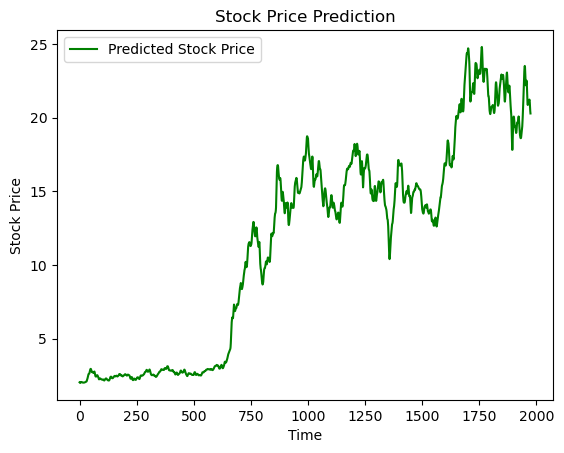

In [25]:
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()